<a href="https://colab.research.google.com/github/Augista/NeuralNetworkObjectDetection/blob/main/Copy_of_CNNstud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

In [ ]:
pip install ultralytics

In [ ]:
!pip install ultralytics
!pip install opencv-python-headless
!pip install pyngrok

In [ ]:
!pip install ultralytics opencv-python-headless


Saving WhatsApp Image 2024-06-05 at 14.01.01_ac8c3b1c.jpg to WhatsApp Image 2024-06-05 at 14.01.01_ac8c3b1c.jpg

0: 640x384 6 persons, 1 dining table, 1 laptop, 181.9ms
Confidence: 0.88
Class name: laptop
Confidence: 0.86
Class name: person
Confidence: 0.81
Class name: person
Confidence: 0.58
Class name: person
Confidence: 0.48
Class name: diningtable
Confidence: 0.38
Class name: person
Confidence: 0.32
Class name: person
Confidence: 0.27
Class name: person
Speed: 3.6ms preprocess, 181.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


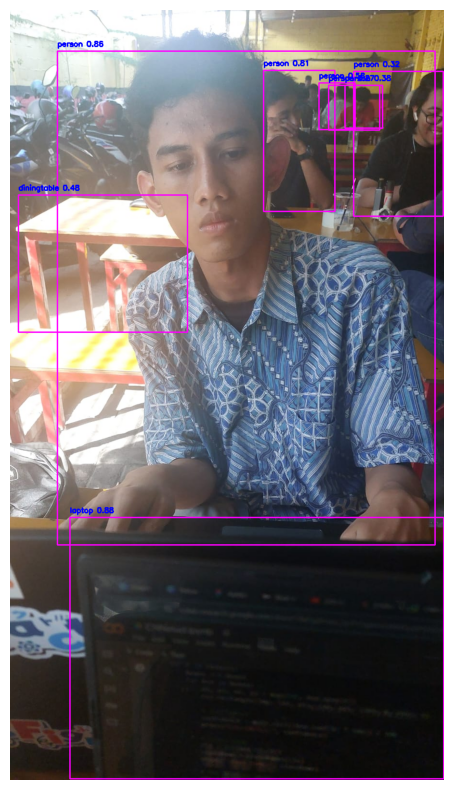

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Upload the image file
uploaded = files.upload()

# Load the YOLO model
model = YOLO("yolov8n.pt")

# Iterate over the uploaded files
for filename in uploaded.keys():
    # Read the image
    img = cv2.imread(filename)

    # Run YOLOv8 model
    results = model(img, stream=True)

    # Object classes
    classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
                  "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
                  "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
                  "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
                  "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
                  "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
                  "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
                  "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
                  "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
                  "teddy bear", "hair drier", "toothbrush"
                  ]
    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 2)

            confidence = math.ceil((box.conf[0] * 100)) / 100
            print("Confidence:", confidence)

            cls = int(box.cls[0])
            className = classNames[cls]
            print("Class name:", className)

            cv2.putText(img, f"{className} {confidence}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
